## Random Forest Regression

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


%matplotlib inline

import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

##### **Split em Treino e Teste**

In [13]:
dados = pd.read_csv("pnad23_filtrado.csv")

In [14]:
dados.isnull().sum()

Estado                 0
Sexo                   0
Idade                  0
Cor_ou_Raça            0
Escolaridade           0
Ocupação               0
Faixa_de_rendimento    0
Rendimento_Bruto       0
dtype: int64

In [15]:
dados.dtypes

Estado                  object
Sexo                    object
Idade                    int64
Cor_ou_Raça             object
Escolaridade            object
Ocupação                object
Faixa_de_rendimento     object
Rendimento_Bruto       float64
dtype: object

In [16]:
x_colunas = dados[['Estado', 'Sexo', 'Idade', 'Cor_ou_Raça', 'Escolaridade', 'Ocupação','Faixa_de_rendimento']]

y_colunas = dados[['Rendimento_Bruto']]


In [17]:
x_dummies = pd.get_dummies(x_colunas)
x_dummies = x_dummies.astype(int)
x_dummies.dtypes

Idade                                   int32
Estado_Acre                             int32
Estado_Alagoas                          int32
Estado_Amapá                            int32
Estado_Amazonas                         int32
                                        ...  
Faixa_de_rendimento_[1SM]+1 a [2SM]     int32
Faixa_de_rendimento_[20SM]+1 ou mais    int32
Faixa_de_rendimento_[2SM]+1 a [3SM]     int32
Faixa_de_rendimento_[3SM]+1 a [5SM]     int32
Faixa_de_rendimento_[5SM]+1 a [10SM]    int32
Length: 65, dtype: object

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies ,y_colunas , test_size=0.33, random_state= 42 )

In [19]:
random_model = RandomForestRegressor(n_estimators=100, random_state = 42 )

In [20]:
random_model.fit(x_train, y_train)

c:\Users\Lucas\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [23]:
y_prev = random_model.predict(x_test)

In [25]:
mae = mean_absolute_error(y_test, y_prev)
mae

434.50358136448807

In [26]:
mse = mean_squared_error(y_test, y_prev)
mse

3465863.87181802

<BarContainer object of 65 artists>

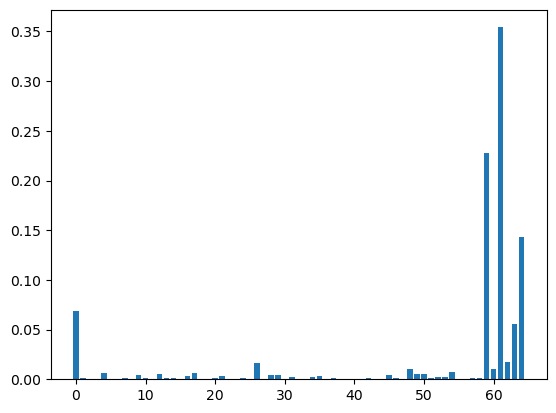

In [28]:
influencia_variáveis = random_model.feature_importances_
plt.bar(range(len(influencia_variáveis)), influencia_variáveis)